In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv("dataset/Congress_White_House.csv")

In [3]:
df.head()

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
0,"Abrams, Adam W.",Employee,66300.0,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
1,"Adams, Ian H.",Employee,45000.0,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
2,"Agnew, David P.",Employee,93840.0,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
3,"Albino, James",Employee,91800.0,Per Annum,SENIOR PROGRAM MANAGER
4,"Aldy, Jr., Joseph E.",Employee,130500.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...


# EDA

In [4]:
df.shape

(469, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 5 columns):
Employee Name      469 non-null object
Employee Status    469 non-null object
Salary             469 non-null float64
Pay Basis          469 non-null object
Position Title     469 non-null object
dtypes: float64(1), object(4)
memory usage: 18.4+ KB


In [8]:
df['Pay Basis'].unique()

array(['Per Annum'], dtype=object)

In [9]:
df['Employee Status'].value_counts()

Employee                437
Detailee                 31
Employee (part-time)      1
Name: Employee Status, dtype: int64

In [10]:
df.nunique()

Employee Name      469
Employee Status      3
Salary             120
Pay Basis            1
Position Title     269
dtype: int64

In [11]:
df.isnull().sum()

Employee Name      0
Employee Status    0
Salary             0
Pay Basis          0
Position Title     0
dtype: int64

In [12]:
df.columns

Index(['Employee Name', 'Employee Status', 'Salary', 'Pay Basis',
       'Position Title'],
      dtype='object')

# Cleaning Data

## What I'm going to do:
- Lowercase all column and replace space with '_'
- delete pay basis column because all is annual so we don't really need the explanation
- rename salary columnt to annual_salary
- extract the job level: director,manager,etc
- drop employee name

In [13]:
df_copy = df.copy()

In [16]:
df_copy.columns = df_copy.columns.str.replace(" ","_").str.lower()

In [17]:
df_copy.columns

Index(['employee_name', 'employee_status', 'salary', 'pay_basis',
       'position_title'],
      dtype='object')

In [21]:
df_copy = df_copy.drop(columns=['pay_basis','employee_name'],axis=1)

In [22]:
df_copy.columns

Index(['employee_status', 'salary', 'position_title'], dtype='object')

In [23]:
df_copy = df_copy.rename(columns={"salary":"annual_salary"})
df_copy.head()

,employee_status,annual_salary,position_title
0,Employee,66300.0,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
1,Employee,45000.0,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
2,Employee,93840.0,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
3,Employee,91800.0,SENIOR PROGRAM MANAGER
4,Employee,130500.0,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...


In [29]:
df_copy.position_title.unique()

array(['WESTERN REGIONAL COMMUNICATIONS DIRECTOR',
       'EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDULING AND ADVANCE',
       'DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS',
       'SENIOR PROGRAM MANAGER',
       'SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY AND ENVIRONMENT',
       'STAFF ASSISTANT', 'SPECIAL ASSISTANT',
       'SPECIAL ASSISTANT TO THE CHIEF OF STAFF', 'POLICY ASSISTANT',
       'SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIATE COUNSEL TO THE PRESIDENT',
       'COUNSEL', 'SENIOR ANALYST', 'ASSISTANT SHIFT LEADER',
       'ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR', 'ANALYST',
       'COMMUNICATIONS DIRECTOR',
       'ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE DOMESTIC POLICY COUNCIL',
       'DEPUTY ASSOCIATE COUNSEL', 'MEDIA MONITOR', 'ASSOCIATE DIRECTOR',
       'ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE PRESIDENT',
       'SPECIAL ASSISTANT AND ADVANCE LEAD',
       'DEPUTY DIRECTOR FOR MEDIA AFFAIRS',
       'LEGISLATIVE ASSISTANT AND ASSISTANT

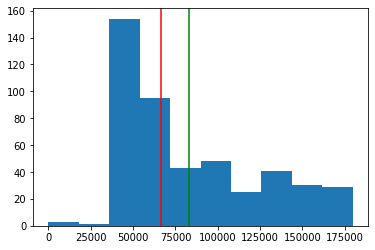

In [40]:
plt.hist(df_copy.annual_salary);
plt.axvline(x= df_copy.annual_salary.mean(),color='green')
plt.axvline(x= df_copy.annual_salary.median(),color = 'red')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [-inf, 12.099044072771651] is not finite